# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import skimpy as skim

### Q1, 1

In [113]:
df = pd.read_csv('/Users/clairicelou/Documents/DS3021/scratchpad/data/airbnb_NYC.csv', encoding='latin1')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [114]:
df['Price'].dtype

<StringDtype(na_value=nan)>

In [115]:
df['Price_clean'] = df['Price'].str.replace(',', '') # Removed any commas

In [116]:
df['Price_clean'] = pd.to_numeric(df['Price_clean'], errors='coerce') # Turns anything that still isn’t a number into NaN

In [117]:
missing_prices = df['Price_clean'].isna().sum()
print(missing_prices)    # Count missing values after cleaning

0


In [118]:
df[['Price', 'Price_clean']].head() # Check the first few rows

,Price,Price_clean
0,145,145
1,37,37
2,28,28
3,199,199
4,549,549


I removed commas because numbers over 999 are written with commas (like 1,112). If the comma isn’t removed, pandas reads it as text.

I used pd.to_numeric with errors='coerce' because any invalid entries (like text “NA” or empty cells) are automatically turned into NaN, which pandas recognizes as missing.

### Q1, 2

In [119]:
mn = pd.read_csv('/Users/clairicelou/Documents/DS3021/scratchpad/data/mn_police_use_of_force.csv', encoding='latin1')
mn.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [120]:
print(mn['subject_injury'].unique())

<ArrowStringArray>
[nan, 'No', 'Yes']
Length: 3, dtype: str


In [121]:
missing_count = mn['subject_injury'].isna().sum()
total_count = len(mn)
print(missing_count / total_count)     # proportion of missing values

0.7619342359767892


In [122]:
mn['subject_injury_clean'] = mn['subject_injury'].map({
    'Yes': 'Yes',
    'No': 'No'
})       

In [123]:
cross_tab = pd.crosstab(mn['force_type'], mn['subject_injury_clean'], dropna=False)
print(cross_tab)     # Cross-tabulate with force_type

subject_injury_clean           No   Yes   NaN
force_type                                   
Baton                           0     2     2
Bodily Force                 1093  1286  7051
Chemical Irritant             131    41  1421
Firearm                         2     0     0
Gun Point Display              33    44    27
Improvised Weapon              34    40    74
Less Lethal                     0     0    87
Less Lethal Projectile          1     2     0
Maximal Restraint Technique     0     0   170
Police K9 Bite                  2    44    31
Taser                         150   172   985


Missing values in subject_injury are more common for force types like Bodily Force, Chemical Irritant, and Taser, which are used more often and usually cause minor or no injuries. For serious or rare force types, like Firearm or Police K9 Bite, almost all injury values are recorded. This shows that the missing data is related to the type of force used, not random.

In [124]:
mn['subject_injury_clean'] = mn['subject_injury_clean'].fillna('Missing') # Replace remaining NaNs with 'Missing'

In [125]:
print(mn['subject_injury_clean'].value_counts())

subject_injury_clean
Missing    9848
Yes        1631
No         1446
Name: count, dtype: int64


### Q1, 3

In [126]:
metabric = pd.read_csv('/Users/clairicelou/Documents/DS3021/scratchpad/data/metabric.csv', encoding='latin1')
metabric.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


In [127]:
print(metabric['Overall Survival Status'].unique()) # first look at unique values

<ArrowStringArray>
['0:LIVING', '1:DECEASED']
Length: 2, dtype: str


In [128]:
metabric['survival_dummy'] = metabric['Overall Survival Status'].apply(lambda x: 1 if 'LIVING' in x else 0) # Convert Overall Survival Status to a dummy variable

In [129]:
print(metabric[['Overall Survival Status', 'survival_dummy']].head())
print(metabric['survival_dummy'].value_counts())

  Overall Survival Status  survival_dummy
0                0:LIVING               1
1              1:DECEASED               0
2                0:LIVING               1
3              1:DECEASED               0
4              1:DECEASED               0
survival_dummy
0    768
1    575
Name: count, dtype: int64


### Q1, 4

In [130]:
missing_count = df['Review Scores Rating'].isna().sum()
total_count = len(df)

print(missing_count)
print(missing_count / total_count)

8323
0.27308222324299497


In [132]:
# Median of non-missing values
median_rating = df['Review Scores Rating'].median()

# New column with missing values replaced by the median
df['Review_Scores_Rating_imputed'] = df['Review Scores Rating'].fillna(median_rating)


print(df[['Review Scores Rating', 'Review_Scores_Rating_imputed']].head())


   Review Scores Rating  Review_Scores_Rating_imputed
0                   NaN                          94.0
1                   NaN                          94.0
2                   NaN                          94.0
3                   NaN                          94.0
4                  96.0                          96.0


The missing review scores are filled in with the median, 94. This might be a problem because it treats all missing scores as if they were average, but in reality, listings with missing scores could be better or worse than average. So using the median could hide the real differences.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

### Q2, 1

In [61]:
import pandas as pd
sharks = pd.read_excel("GSAF5.xls")

sharks.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19th January,2026.0,Unprovoked,Australia,NSW,North Steyne,Surfing,Andre de Ruyter,M,27,...,5m shark species not determined,9 News: Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18th January,2026.0,Unprovoked,Australia,NSW,Nielsen Park Vaucluse Sydney Harbour,Jumping off rocks,Nico Antic,M,12,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10th January,2026.0,Unprovoked,Australia,NSW,Avalon Beach,Surfing,Paul Stanton,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


You know it’s an Excel file because of the .xls extension and the fact that spreadsheet software opens it directly.

### Q2, 2

In [62]:
empty_cols = sharks.columns[sharks.isna().all()]
sharks = sharks.drop(columns=empty_cols)

print(sharks.columns)

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='str')


### Q2, 3

An observation is a single data point, so here it is a shark attack incident. Each row is one reported attack event, usually involving one person at a specific time and location. This means that every cleaning step must preserve individual incidents rather than aggregating rows and missing values should be handled carefully so that real attacks are not accidentally removed or misrepresented.


### Q2, 4

In [65]:
# Here I cleaned the year variable
sharks['Year'] = pd.to_numeric(sharks['Year'], errors='coerce') #converts year to numeric and errors to NaN

# Here removes invalid years (like 0 or before 1940)
sharks.loc[sharks['Year'] < 1940, 'Year'] = pd.NA

In [67]:
sharks['Year'].describe()


print(sharks['Year'].min(), sharks['Year'].max())


1940.0 2026.0


Some of the year values do not make sense because there are extremely early years and future years like 2026 (we are still in the beginning of 2026). These are likely caused by mistakes or data entry errors in the data.

In [68]:
# Filter the rows to focus on attacks since 1940
sharks_1940 = sharks[sharks['Year'] >= 1940]

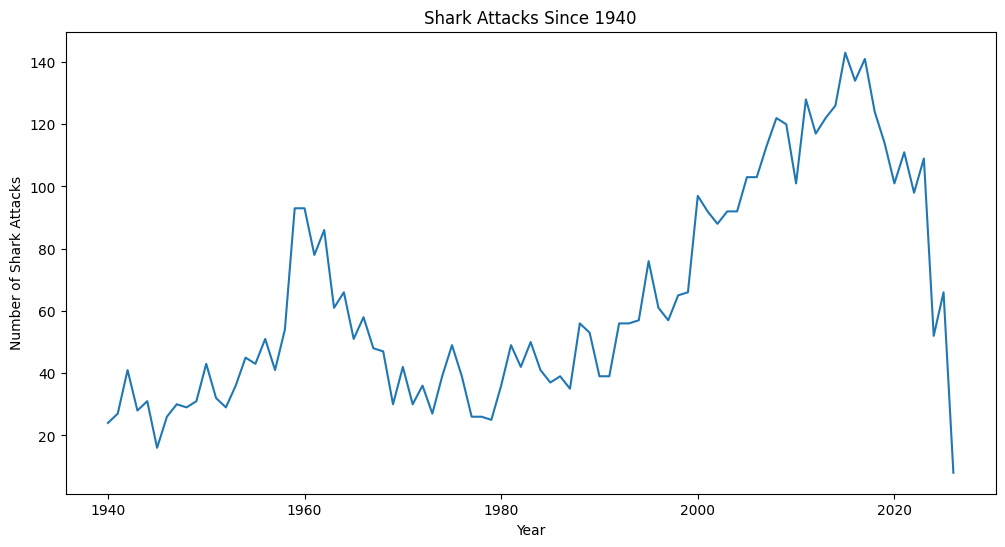

In [ ]:
attacks_per_year = sharks_1940.groupby('Year').size()

plt.figure(figsize=(12,6))
attacks_per_year.plot()
plt.xlabel('Year')
plt.ylabel('Number of Shark Attacks')
plt.title('Shark Attacks Since 1940')
plt.show()

Shark attacks generally increase after the mid-1900s, with some ups and downs over time. Part of this increase is likely because of better reporting rather than more actual attacks. The sharp drop after 2020 is probably because recent data is incomplete.

### Q2, 5

In [70]:
# Here I removed commas and other non-numeric text
sharks['Age_clean'] = sharks['Age'].astype(str).str.replace(',', '')

# Convert to numeric
sharks['Age_clean'] = pd.to_numeric(sharks['Age_clean'], errors='coerce')

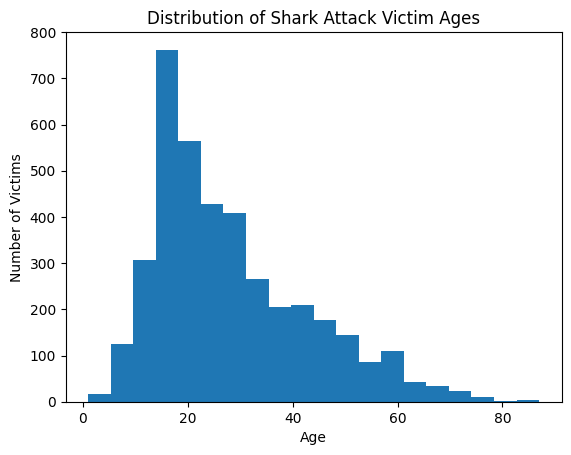

In [71]:
sharks['Age_clean'].plot.hist(bins=20)
plt.xlabel("Age")
plt.ylabel("Number of Victims")
plt.title("Distribution of Shark Attack Victim Ages")
plt.show()

### Q2, 6

In [72]:
sharks['Type'].value_counts()

Type
Unprovoked             5221
Provoked                642
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             26
Boat                      7
 Provoked                 2
unprovoked                1
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64

In [ ]:
sharks['Type'] = sharks['Type'].astype(str).str.strip().str.title()

sharks['Type_clean'] = 'Unknown'

sharks.loc[sharks['Type'] == 'Unprovoked', 'Type_clean'] = 'Unprovoked'

sharks.loc[sharks['Type'] == 'Provoked', 'Type_clean'] = 'Provoked'


In [74]:
sharks['Type_clean'].value_counts()

Type_clean
Unprovoked    5222
Unknown       1204
Provoked       644
Name: count, dtype: int64

In [75]:
total_attacks = sharks.shape[0]
unprovoked_attacks = (sharks['Type_clean'] == 'Unprovoked').sum()

proportion_unprovoked = unprovoked_attacks / total_attacks
print(proportion_unprovoked)


0.7386138613861386


Proportion unprovoked is about 0.74.

### Q2, 7

In [80]:
sharks['Fatal Y/N'].value_counts()

Fatal Y/N
N          4930
Y          1487
UNKNOWN      71
 N            7
F             5
M             3
n             1
Nq            1
2017          1
Y x 2         1
N             1
y             1
Name: count, dtype: int64

In [81]:
sharks['Fatal Y/N'] = sharks['Fatal Y/N'].astype(str).str.strip().str.upper()

sharks['Fatal_clean'] = 'Unknown'

sharks.loc[sharks['Fatal Y/N'] == 'Y', 'Fatal_clean'] = 'Y'
sharks.loc[sharks['Fatal Y/N'] == 'N', 'Fatal_clean'] = 'N'

sharks['Fatal_clean'].value_counts()

Fatal_clean
N          4939
Y          1488
Unknown     643
Name: count, dtype: int64

### Q2, 8

Shark attacks are more likely to be fatal when they are provoked than when they are unprovoked. Provoked attacks usually happen when a person directly interacts with a shark, increasing the risk of serious injury, while unprovoked attacks are often defensive and are less likely to be fatal.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

### Q3, 1

This paper is about data tidying, a way to make data cleaning easy and effective. It will talk about how tidy datasets are easy to work with and will explore the advantages of having a consistent data structure and this will be shown through a case study.

### Q3, 2

The tidy data standard is intended to accomplish making data analysis easier and more efficient by giving us a way to organize datasets. It helps make cleaning a lot simpler and gives us tools to work together. It also lets analysts focus on the actual problem instead of doing all the work to fix messy data.

### Q3, 3

What “Like families, tidy datasets are all alike but every messy dataset is messy in its own way.” means:

I think that this means that all tidy datasets follow the same structure such as how rows are observations and columns are variables so they all “look alike” and are easy to work with. However, messy datasets can be disorganized in a lot of different formats like missing labels or different units so they all have its own unique problems.


What “For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general.” means:

This means that for a specific dataset you can usually tell what counts as a observations and a variable. In the reading, you can tell easily in Table 1. John Smith is an observation, and “treatmenta” is a variable. But across all datasets, it’s hard to give one definition of what exactly counts as a variable or an observation because datasets can represent different kinds of information.

### Q3, 4

Values: It describes values as individual pieces of a dataset. They are usually numbers or text/strings, so quantitative or qualitative. Every value belongs to both a variable and an observation.

Variables: A variable has all the values that measure the same attribute across units, such as height. In Table 3, the variables are the person, like John, treatment a or b, and result which are the numbers of outcomes/missing values.

Observations: An observation has all the values that measure the same unit across attributes, such as a person or day. In Table 3, each row (“John Smith, a, —”) is an observation.

### Q3, 5

Tidy Data is defined as a way to organize a dataset so that its structure matches its meaning. Each variable is a column, each observation is a row, and each type of observational unit is its own table, making analysis easier and less likely to get errors.

### Q3, 6

The 5 most common problems with messy datasets:
1. Column headers are values, not variable names: The column names actually represent data values instead of clearly labeling the variable.
2. Multiple variables stored in one column: A single column contains information about more than one variable.
3. Variables stored in both rows and columns: Sometimes some variables are in rows and others in columns, so it ends up being an inconsistent layout.
4. Multiple types of observational units in the same table: Different kinds of units are mixed together in one table.
5. A single observational unit stored in multiple tables: Information about the same unit is split across multiple tables instead of being in one place.

Why are the data in Table 4 messy? 

Table 4 is messy because the income ranges are used as column headers even though they are actually values of the income variable. Each variable should have been its own column. Each row only shows religion, while the actual observations (religion and income) are spread across many columns instead of being in a single row.

What is "melting" a dataset?
Melting a dataset means taking columns and turning them into rows to make the data tidy. The columns that are already real variables are kept and then the other columns are stacked into two new ones, one for the old column names like income and one for the actual values. After melting, each variable has its own column and each observation is in its own row.

### Q3, 7

Table 11 is messy because the days of the month (d1, d2, d3, etc.) are column headers, even though they’re actually values of a “day” variable. This spreads one observation, the weather on a specific day, across many columns and creates lots of missing values. It also mixes variables across rows and columns, which makes analyzing the data harder.

Table 12 is tidy because the day information has been moved into rows, so each row is one day at one weather station. The molten version stacks the day columns into a single “date” and “value” structure, and the final tidy version separates tmax and tmin into their own columns. Each variable has its own column and each observation is in one row.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

### Q4, 1

In [77]:
gifts = pd.read_csv('/Users/clairicelou/Documents/DS3021/scratchpad/data/ForeignGifts_edu.csv', encoding='latin1')
gifts.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


### Q4, 2

<Axes: >

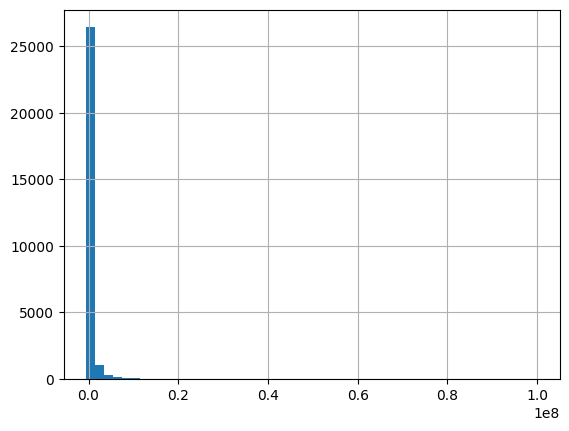

In [133]:
gifts['Foreign Gift Amount'].hist(bins=50)

Foreign Gift Amount is a quantitative, continuous variable measuring the dollar value of foreign financial transfers to U.S. universities.

The histogram shows that most foreign gifts are very small or near zero, while a small number of gifts are extremely large. These large values create a strong right skew, making the distribution highly uneven and causing most observations to cluster near zero.

### Q4, 3

In [134]:
gifts['Gift Type'].value_counts()

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64

In [135]:
gifts['Gift Type'].value_counts(normalize=True)

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64

Most foreign financial transfers to U.S. universities are contracts, which make up about 61% of all gifts. Monetary gifts account for about 39% of transfers, while real estate gifts are really rare, representing less than 1% of all gifts. This shows that foreign involvement with U.S. universities is mostly structured through contractual agreements rather than direct donations or property transfers.

### Q4, 4

In [138]:
top15_count = gifts.groupby('Country of Giftor')['Foreign Gift Amount'].count().sort_values(ascending=False).head(15)
top15_count

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: Foreign Gift Amount, dtype: int64

In [139]:
top15_amount = gifts.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
top15_amount

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64

### Q4, 5

In [140]:
top15_institutions = gifts.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
top15_institutions

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64

<Axes: >

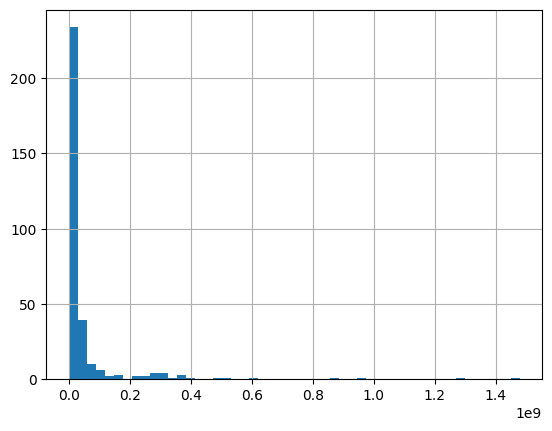

In [141]:
total_by_institution = gifts.groupby('Institution Name')['Foreign Gift Amount'].sum()

total_by_institution.hist(bins=50)

The histogram shows that most institutions receive small total foreign gifts, while a few universities receive extremely large amounts. The histogram shows a strongly right skewed distribution, displaying that foreign financial transfers are concentrated in a small number of top universities.

### Q4, 6

In [142]:
total_by_giftor = gifts.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False)

top_giftors = total_by_giftor.head(15)
top_giftors

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64

The Qatar Foundation provides the largest total amount of foreign funding to U.S. universities, followed by several other other major giftors. Overall, a few organizations account for the majority of foreign financial support, while most giftors contribute much smaller amounts.

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

### Q5, 1

In [78]:
college = pd.read_csv('/Users/clairicelou/Documents/DS3021/scratchpad/data/college_completion.csv', encoding='latin1')

### Q5, 2

In [79]:
college.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


The dataset contains 5 observations and 63 variables.

### Q5, 3

In [82]:
cross_tab2 = pd.crosstab(college['control'], college['level'], dropna=False)
print(cross_tab2)     

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


Public institutions are mostly 2 year schools, while private not-for-profit institutions are mostly 4-year schools. Private for-profit institutions are more evenly split between 2-year and 4-year schools. Overall, public schools dominate the 2-year category, and private not-for-profit schools dominate the 4-year category.

### Q5, 4

<Axes: ylabel='Density'>

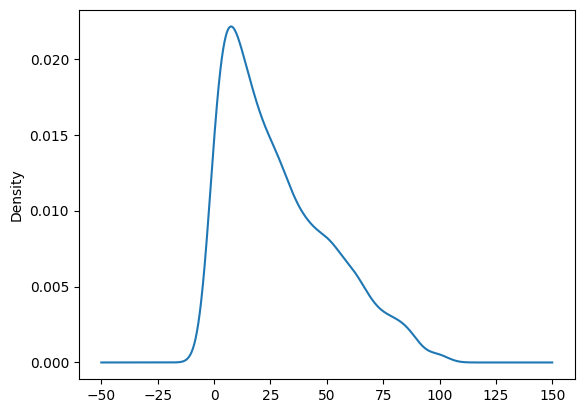

In [86]:
college['grad_100_value'].plot.kde()

In [88]:
college['grad_100_value'].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

In [89]:
college.groupby('control')['grad_100_value'].describe()

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


control
Private for-profit        Axes(0.125,0.11;0.775x0.77)
Private not-for-profit    Axes(0.125,0.11;0.775x0.77)
Public                    Axes(0.125,0.11;0.775x0.77)
Name: grad_100_value, dtype: object

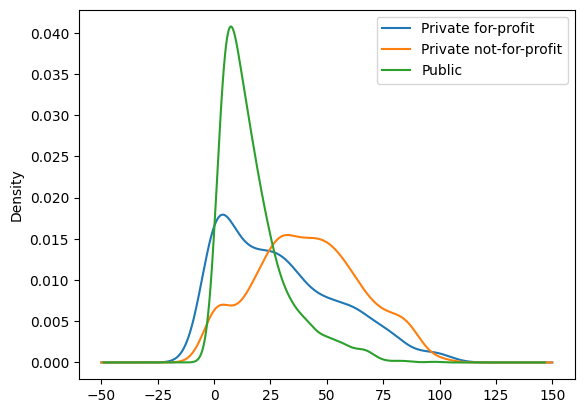

In [87]:
college.groupby('control')['grad_100_value'].plot.kde(legend=True)

Private not-for-profit institutions, because their distribution is centered at higher graduation rates, even though public institutions show a higher density at lower values. They have the highest mean and median (mean ≈ 41.7, median ≈ 41.0) graduation rates compared to private for-profit and public institutions.

### Q5, 5

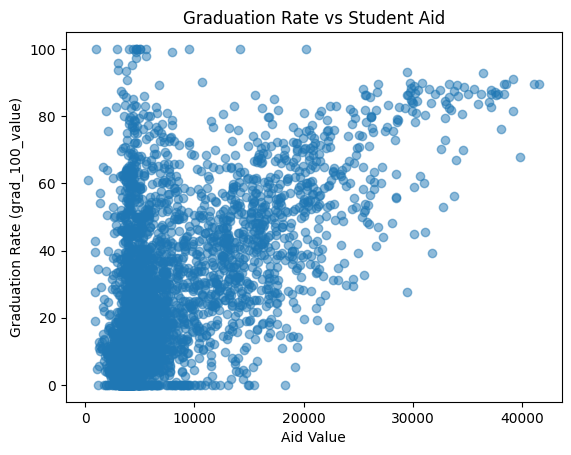

In [ ]:
plt.scatter(college['aid_value'], college['grad_100_value'], alpha=0.5)
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (grad_100_value)')
plt.title('Graduation Rate vs Student Aid')
plt.show()


In [92]:
vars_list = ['aid_value', 'grad_100_value']

# Covariance
cov_matrix = college.loc[:, vars_list].cov(numeric_only=True)
print( cov_matrix)

# Correlation
corr_matrix = college.loc[:, vars_list].corr(numeric_only=True)
print( corr_matrix)

                   aid_value  grad_100_value
aid_value       4.121201e+07    88610.483169
grad_100_value  8.861048e+04      543.483382
                aid_value  grad_100_value
aid_value        1.000000        0.575879
grad_100_value   0.575879        1.000000


Aid looks like it tends to vary positively with graduation rates mainly for public institutions. Private not-for-profit and for-profit schools show weaker/ less consistent relationships.

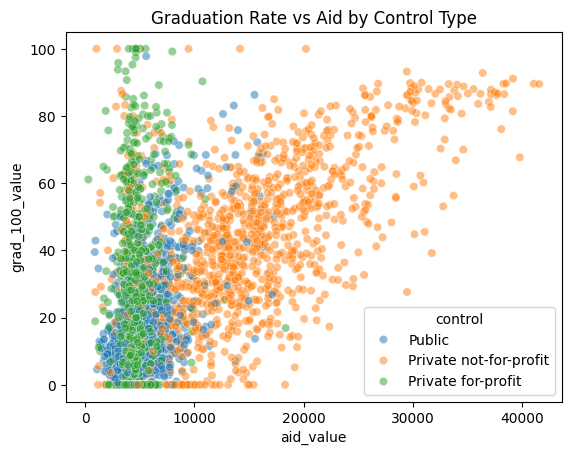

In [93]:
# condition on control

sns.scatterplot(data=college, x='aid_value', y='grad_100_value', hue='control', alpha=0.5)
plt.title('Graduation Rate vs Aid by Control Type')
plt.show()


Private not-for-profit institutions appear to have aid varying positively with graduation rates.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

#### Answers are on a PDF in my Github Repo. It's called "Wrangling And Eda.pdf"

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

### Q7, 1

In [143]:
ames = pd.read_csv('/Users/clairicelou/Documents/DS3021/scratchpad/data/ames_prices.csv', encoding='latin1')

ames.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


### Q7, 2

<Axes: ylabel='Density'>

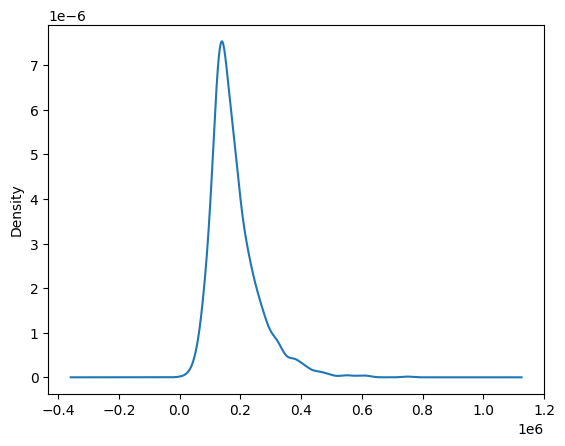

In [145]:
ames['price'].plot.kde()

In [146]:
ames['price'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

Bldg.Type
1Fam      Axes(0.125,0.11;0.775x0.77)
2fmCon    Axes(0.125,0.11;0.775x0.77)
Duplex    Axes(0.125,0.11;0.775x0.77)
Twnhs     Axes(0.125,0.11;0.775x0.77)
TwnhsE    Axes(0.125,0.11;0.775x0.77)
Name: price, dtype: object

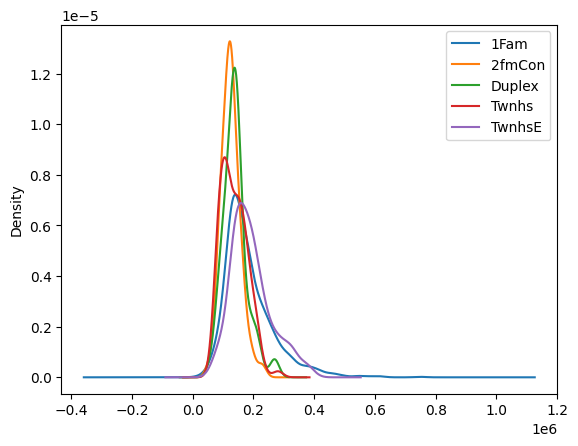

In [147]:
ames.groupby('Bldg.Type')['price'].plot.kde(legend=True)


In [148]:
ames.groupby('Bldg.Type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


End unit townhomes (TwnhsE) and single family homes are the most expensive on average, with TwnhsE having the h ghest mean price. Single-family homes have the highest variance in transaction prices, showing the widest spread in housing prices.

### Q7, 3

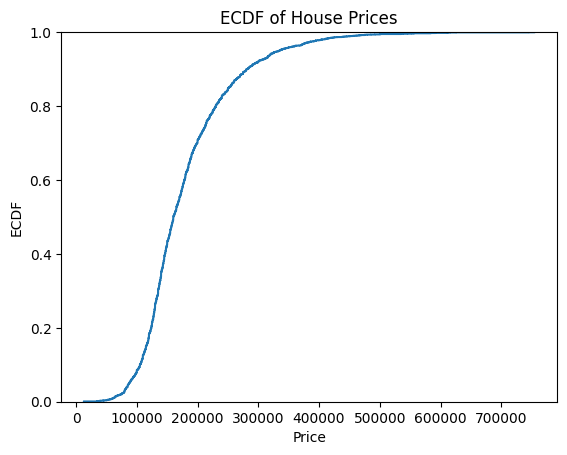

In [149]:
sns.ecdfplot(ames['price'])
plt.xlabel('Price')
plt.ylabel('ECDF')
plt.title('ECDF of House Prices')
plt.show()

In [150]:
ames['price'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

### Q7, 4

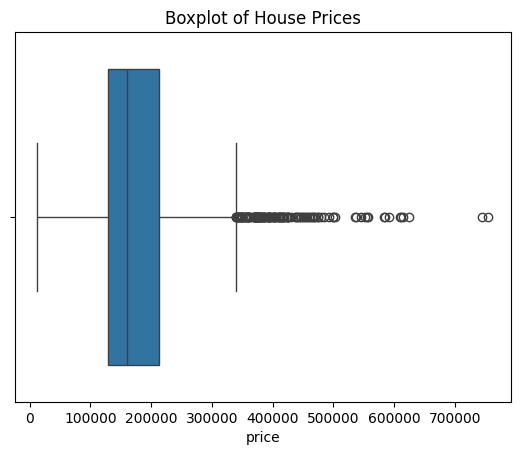

In [151]:
sns.boxplot(x=ames['price'])
plt.title('Boxplot of House Prices')
plt.show()



The boxplot shows some high price outliers, meaning there's a long right tail in house prices.

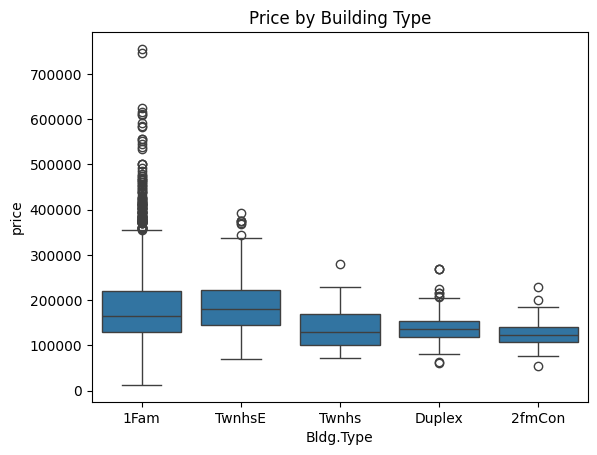

In [152]:
sns.boxplot(data=ames, x='Bldg.Type', y='price')
plt.title('Price by Building Type')
plt.show()


Single-family homes have the highest prices and the widest spread, while duplexes and townhomes tend to have lower prices and less variation.

### Q7, 5

In [155]:
q75 = np.nanquantile(ames['price'], 0.75)
q25 = np.nanquantile(ames['price'], 0.25)
iqr = q75 - q25

upper_whisker = q75 + 1.5 * iqr
lower_whisker = q25 - 1.5 * iqr

ames['price_is_outlier'] = ((ames['price'] < lower_whisker) | (ames['price'] > upper_whisker)).astype(int)

### Q7, 6

In [156]:
# winsorize price variable
ames['price_winsorized'] = ((ames['price'] < lower_whisker) * lower_whisker + (ames['price'] > upper_whisker) * upper_whisker + ((ames['price'] >= lower_whisker) & (ames['price'] <= upper_whisker)) * ames['price'])


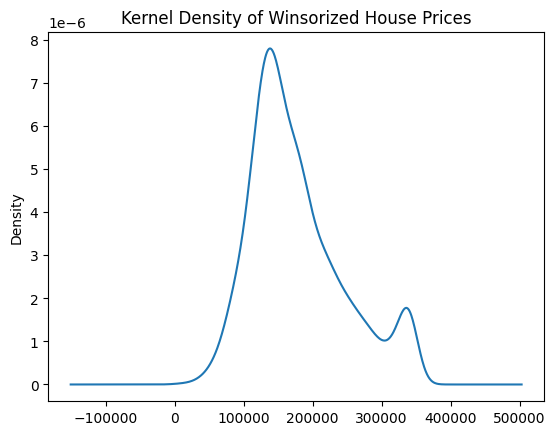

In [157]:
# Kernel density plot
ames['price_winsorized'].plot.kde()
plt.title('Kernel Density of Winsorized House Prices')
plt.show()


In [158]:
ames['price_winsorized'].describe()

count      2930.000000
mean     177082.283959
std       67906.837135
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      339500.000000
Name: price_winsorized, dtype: float64

After winsorizing the very high house prices are cut down, so the maximum price is lower. The spread of prices decreases which is shown by the smaller standard deviation. The median stays the same, meaning the typical house price doesn’t change. The distribution is less skewed to the right, and the density plot looks smoother because extreme outliers no longer affect it as much.